<p style="background-color:#FF3355;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid red;">Visualizing Data on Road Traffic Deaths from 1990-2019<hr></p>


<!-- # <center> <b>Deaths </b></center><hr> -->
<center><img src= "https://raw.githubusercontent.com/ashwinshetgaonkar/kaggle-kernel-images/main/car-accident.png" alt ="Road Accident" style='width:600px;'></center><br>



## <b style='color:red'>Contents<hr></b>
[**1.Importing Libraries**](#import-lib)

[**2.Importing and Preprocessing Data**](#import-data-pre)

[**3.Total Deaths Region wise from 1990-2019 (in top 30 Regions)**](#total-deaths)

[**4.Total Deaths Region wise from 1990-2019 (in top 30 Regions with respect to side of Driving)**](#total-deaths-side)

[**5.Median Deaths Region wise from 1990-2019 (in top 30 Regions)**](#median-deaths)

[**6.Max Mean Percentage Deaths Region wise from 1990-2019 (in top 30 Regions)**](#percent-deaths)

[**7.Total Deaths Year wise from 1990-2019**](#total-deaths-yearly)

[**8.Percentage Deaths Year wise from 1990-2019**](#percent-deaths-yearly)

[**9.Top Regions with Max Deaths Year wise from 2015-2019**](#top-region-deaths-yearly)

[**10.Year wise Distribution of Deaths from 1990-2019 for Top 30 Regions with max Deaths**](#dist-deaths-yearly)

## <b id='import-lib' style='color:red'>Importing Libraries<hr></b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <b id='import-data-pre' style='color:red'>Importing and Preprocessing Data<hr></b>

In [2]:
df=pd.read_csv('../input/road-traffic-deaths-1990-to-2019/output.csv')
df.head()

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
0,Afghanistan,AFG,1990,4154,0,12412311.0
1,Afghanistan,AFG,1991,4472,0,13299016.0
2,Afghanistan,AFG,1992,5106,0,14485543.0
3,Afghanistan,AFG,1993,5681,0,15816601.0
4,Afghanistan,AFG,1994,6001,0,17075728.0


In [3]:
# renaming the columns
df.rename(columns={'Entity':'Region','Sidedness':'Side'},inplace=True)

In [4]:
# converting numerical data to categorical form
df['Side']=np.where(df['Side']==0,'Right','Left')

In [5]:
df.head()

,Region,Code,Year,Deaths,Side,Historical_Population
0,Afghanistan,AFG,1990,4154,Right,12412311.0
1,Afghanistan,AFG,1991,4472,Right,13299016.0
2,Afghanistan,AFG,1992,5106,Right,14485543.0
3,Afghanistan,AFG,1993,5681,Right,15816601.0
4,Afghanistan,AFG,1994,6001,Right,17075728.0


In [6]:
# dropping the unnecessary column
df.drop(columns=['Code'],inplace=True)

In [7]:
# checking the number of rows and columns
df.shape

(8010, 5)

In [8]:
# checking for duplicate rows
df.duplicated().sum()

0

In [9]:
# checking for NaN values
df.isna().sum()

Region                      0
Year                        0
Deaths                      0
Side                        0
Historical_Population    1710
dtype: int64

In [10]:
# finding the regions which have NaN values for 'Historical_Population'
df[df['Historical_Population'].isna()]['Region'].unique()

array(['African Region', 'African Union', 'America',
       'Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central sub-Saharan Africa',
       'Commonwealth', 'Commonwealth High Income',
       'Commonwealth Low Income', 'Commonwealth Middle Income',
       'East Asia', 'East Asia & Pacific - World Bank region',
       'Eastern Europe', 'Eastern Mediterranean Region',
       'Eastern sub-Saharan Africa', 'England',
       'Europe & Central Asia - World Bank region', 'European Region',
       'European Union', 'G20', 'High SDI', 'High-income',
       'High-income Asia Pacific', 'High-income North America',
       'High-middle SDI', 'Latin America & Caribbean - World Bank region',
       'Low SDI', 'Low-middle SDI', 'Middle East & North Africa',
       'Middle SDI', 'Nordic Region', 'North Africa and Middle East',
       'Northern Ireland', 'OECD Count

In [11]:
# imputing the NaN values with the median value considering all Regions
median_population=df['Historical_Population'].median()
df['Historical_Population'].fillna(median_population,inplace=True)

In [12]:
# percentage deaths for all Regions
df['%_deaths']=(df['Deaths']/df['Historical_Population'])*100

In [13]:
# dropping the 'Historical_Population' columns as its impact is already available in '%_deaths' in a better way
df.drop(columns=['Historical_Population'],inplace=True)

In [14]:
df.head()

,Region,Year,Deaths,Side,%_deaths
0,Afghanistan,1990,4154,Right,0.033467
1,Afghanistan,1991,4472,Right,0.033627
2,Afghanistan,1992,5106,Right,0.035249
3,Afghanistan,1993,5681,Right,0.035918
4,Afghanistan,1994,6001,Right,0.035143


# <center><b  id='total-deaths'  style='color:red'>Total Deaths Region wise from 1990-2019 (in top 30 Regions)<hr></b></center>


In [15]:
# total deaths region wise
total_deaths_region_wise=df.groupby('Region')['Deaths'].sum().reset_index()
total_deaths_region_wise.columns=['Region','Total Deaths']
total_deaths_region_wise=total_deaths_region_wise.sort_values('Total Deaths',ascending=False)[:30]
total_deaths_region_wise.head()

,Region,Total Deaths
259,World,36317087
91,G20,23328740
14,Asia,21670793
263,World Bank Upper Middle Income,16041327
152,Middle SDI,13623644


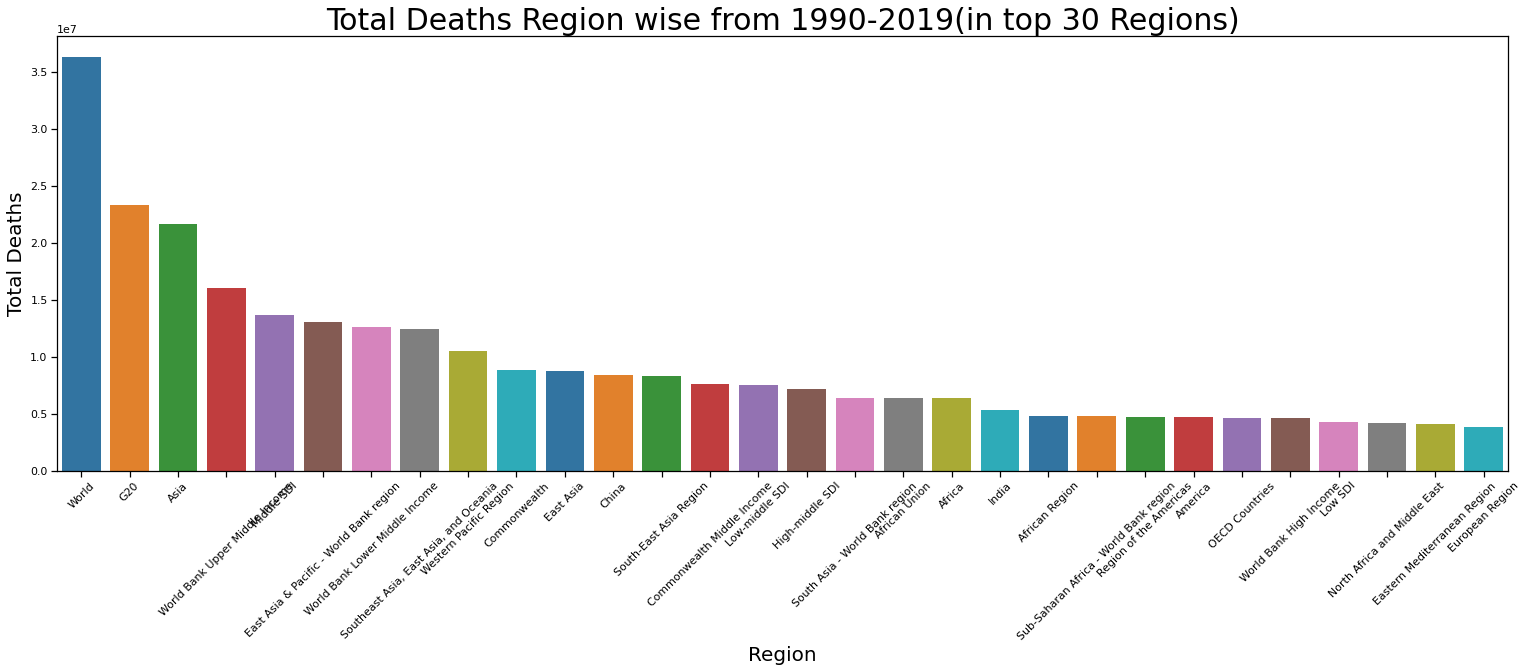

In [16]:
sns.set_context('notebook',font_scale=1)
plt.figure(figsize=(26,8))
sns.barplot(data=total_deaths_region_wise,x='Region',y='Total Deaths',palette='tab10');
plt.title('Total Deaths Region wise from 1990-2019(in top 30 Regions)',size=30)
plt.ylabel('Total Deaths',size=20)
plt.xlabel('Region',size=20)
plt.xticks(rotation=45);

# <center><b id='total-deaths-side'   style='color:red'>Total Deaths Region wise from 1990-2019 (in top 30 Regions with respect to side of Driving)<hr></b></center>


In [17]:
# total deaths region wise with respect to side (left or right)
total_deaths_region_wise_side=df.groupby(['Region','Side'])['Deaths'].sum().reset_index()
total_deaths_region_wise_side.columns=['Region','Side','Total Deaths']
total_deaths_region_wise_side=total_deaths_region_wise_side.sort_values('Total Deaths',ascending=False)[:30]
total_deaths_region_wise_side.head()

,Region,Side,Total Deaths
259,World,Right,36317087
91,G20,Right,23328740
14,Asia,Right,21670793
263,World Bank Upper Middle Income,Right,16041327
152,Middle SDI,Right,13623644


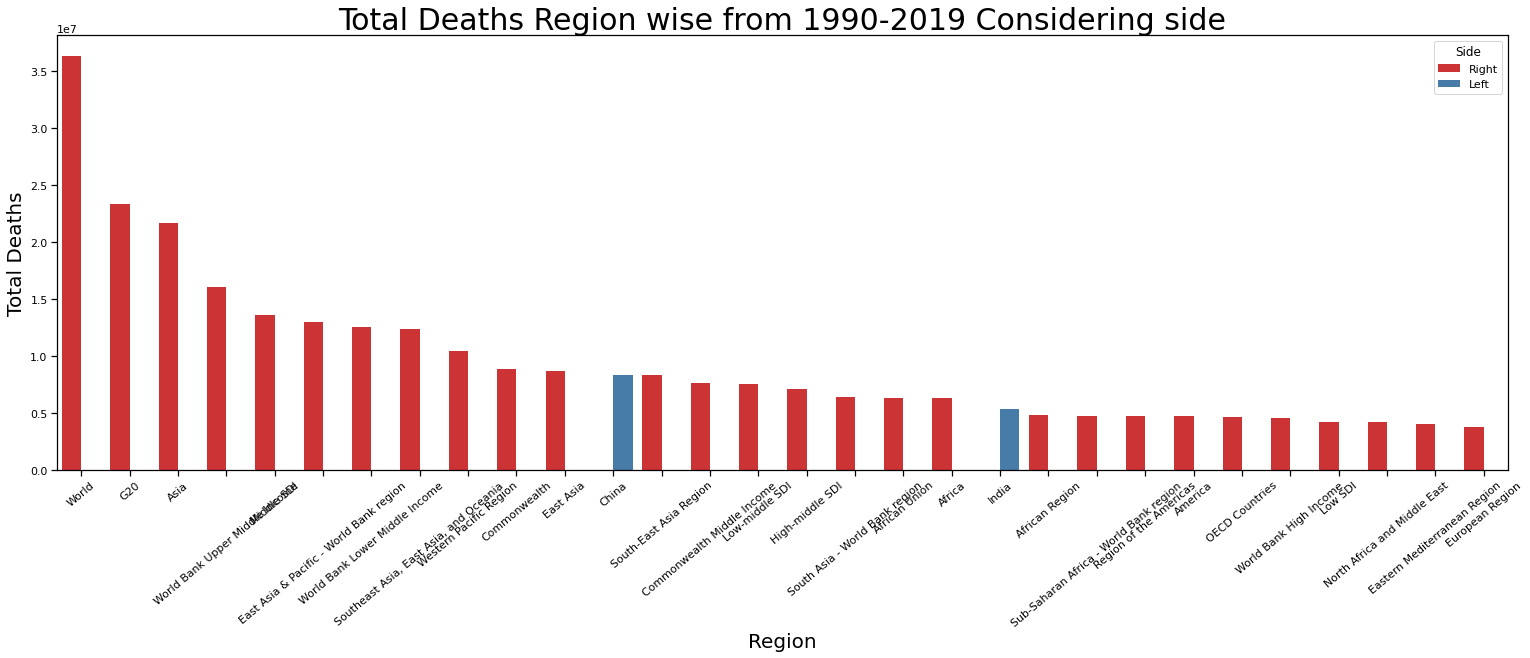

In [18]:
plt.figure(figsize=(26,8))
sns.barplot(data=total_deaths_region_wise_side,x='Region',y='Total Deaths',hue='Side',palette='Set1');
plt.title('Total Deaths Region wise from 1990-2019 Considering side',size=30)
plt.ylabel('Total Deaths',size=20)
plt.xlabel('Region',size=20)
plt.xticks(rotation=40);

<h3> <b style='color:red'>Inference</b>:Only two Regions ['India','China'] have left side as their Driving Side in the top Regions with max Deaths.</h3>

# <center><b id='median-deaths' style='color:red'>Median Deaths Region wise from 1990-2019 (in top 30 Regions)<hr></b></center>

In [19]:
# median deaths region wise
median_deaths_region_wise=df.groupby('Region')['Deaths'].median().reset_index()
median_deaths_region_wise.columns=['Region','Median Deaths']
median_deaths_region_wise=median_deaths_region_wise.sort_values('Median Deaths',ascending=False)[:30]
median_deaths_region_wise.head()

,Region,Median Deaths
259,World,1207581.5
91,G20,770420.0
14,Asia,728209.5
263,World Bank Upper Middle Income,524403.0
152,Middle SDI,451390.5


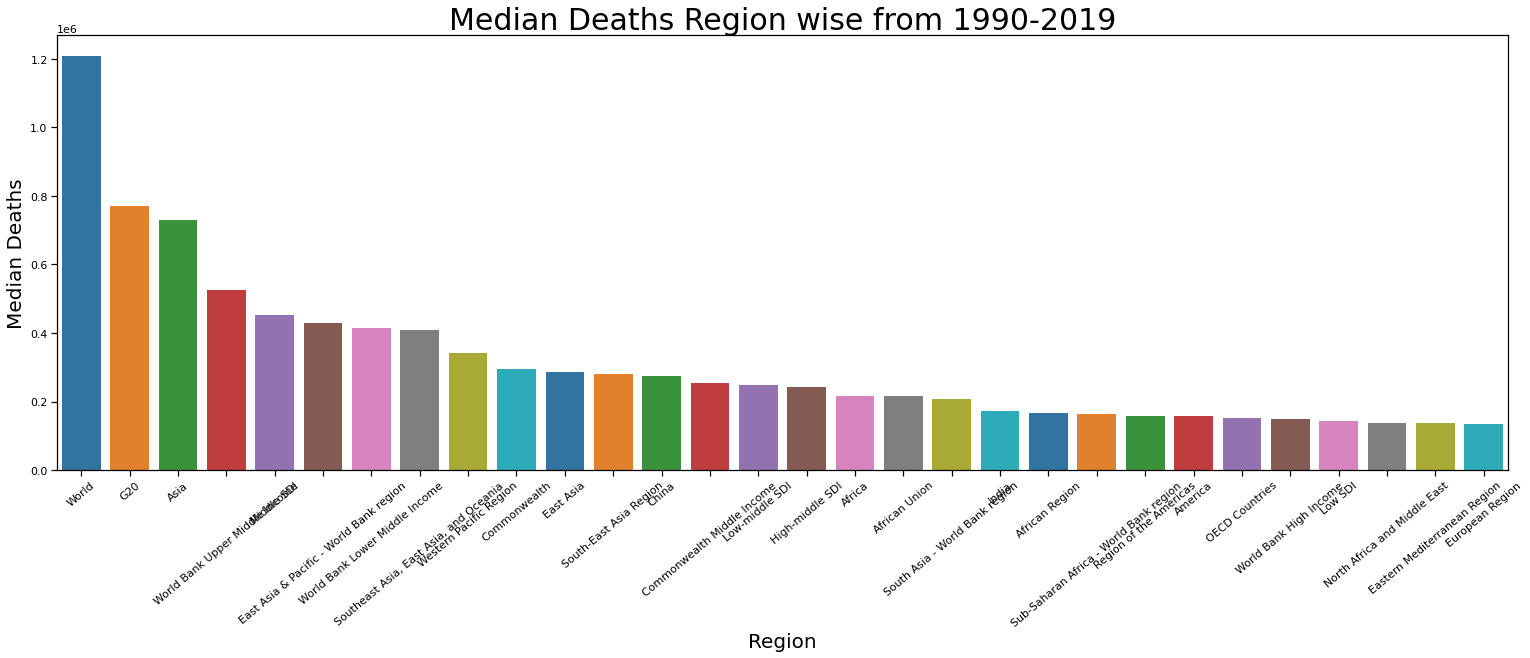

In [20]:
plt.figure(figsize=(26,8))
sns.barplot(data=median_deaths_region_wise,x='Region',y='Median Deaths',palette='tab10')
plt.title('Median Deaths Region wise from 1990-2019',size=30)
plt.ylabel('Median Deaths',size=20)
plt.xlabel('Region',size=20)
plt.xticks(rotation=40);

# <center><b id='percent-deaths'    style='color:red'>Max Mean Percentage Deaths Region wise from 1990-2019 (in top 30 Regions)<hr></b></center>

In [21]:
# max %_deaths region wise
max_death_percent=df.groupby('Region')['%_deaths'].mean().reset_index()
max_death_percent.columns=['Region','%_deaths']
max_death_percent=max_death_percent.sort_values('%_deaths',ascending=False)[:30]
max_death_percent.head()

,Region,%_deaths
91,G20,11.958696
263,World Bank Upper Middle Income,8.223048
152,Middle SDI,6.983704
71,East Asia & Pacific - World Bank region,6.682003
262,World Bank Lower Middle Income,6.458776


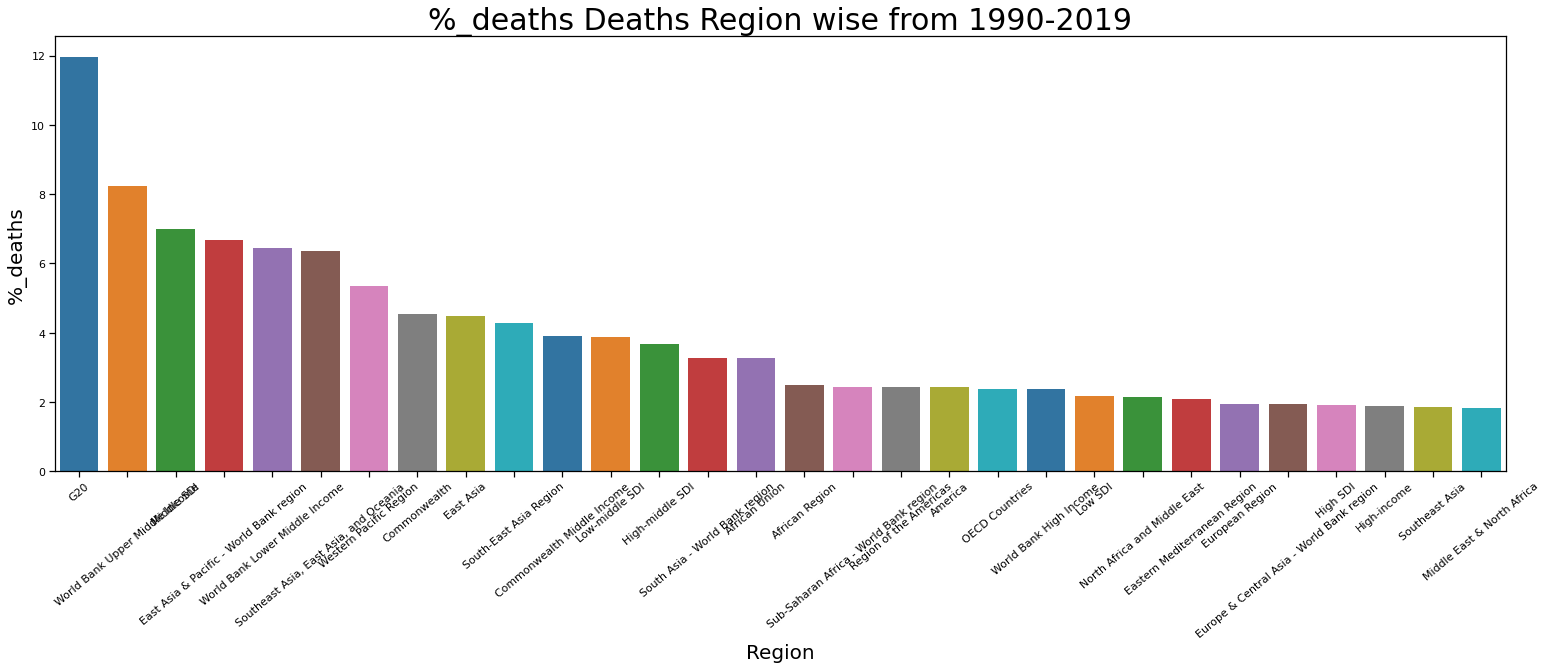

In [22]:
plt.figure(figsize=(26,8))
sns.barplot(data=max_death_percent,x='Region',y='%_deaths',palette='tab10')
plt.title('%_deaths Deaths Region wise from 1990-2019',size=30)
plt.ylabel('%_deaths',size=20)
plt.xlabel('Region',size=20)
plt.xticks(rotation=40); 

# <center><b id='total-deaths-yearly' style='color:red'>Total Deaths Year wise from 1990-2019<hr></b></center>

In [23]:
# total deaths year wise
total_deaths_year_wise=df.groupby('Year')['Deaths'].sum().reset_index()
total_deaths_year_wise.columns=['Year','Total Deaths']
total_deaths_year_wise=total_deaths_year_wise.sort_values('Total Deaths',ascending=False)
total_deaths_year_wise.head()

,Year,Total Deaths
18,2008,12594304
19,2009,12554082
20,2010,12514013
17,2007,12500797
15,2005,12482085


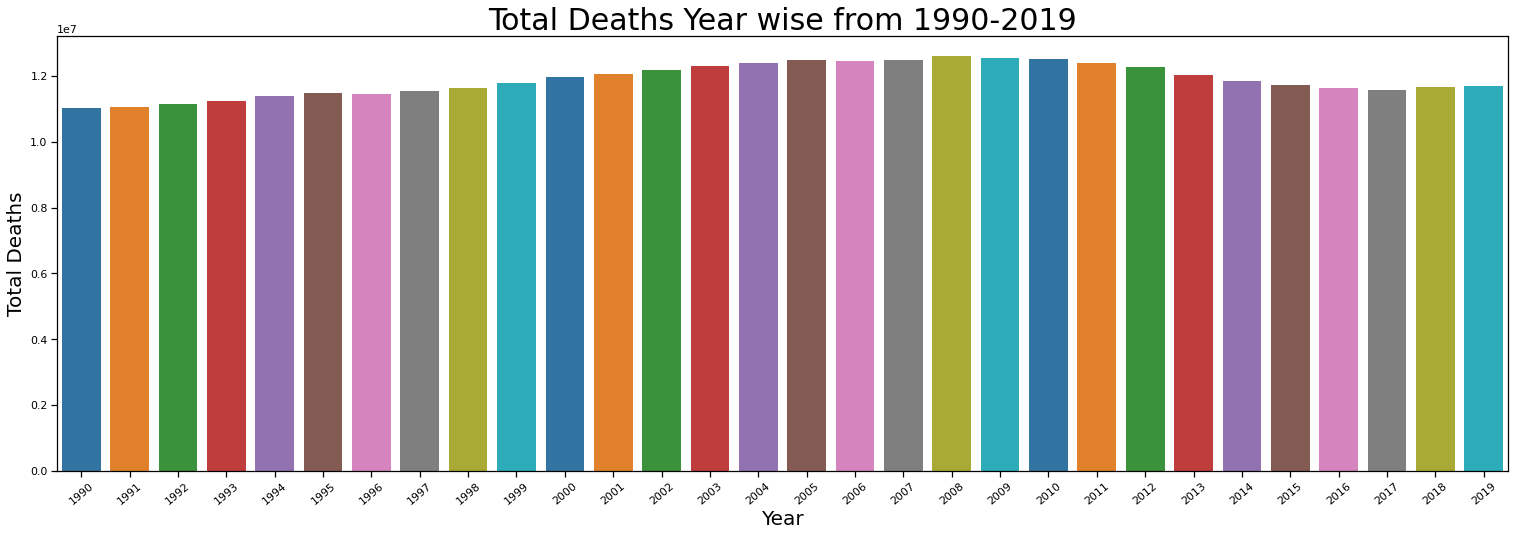

In [24]:
plt.figure(figsize=(26,8))
sns.barplot(data=total_deaths_year_wise,x='Year',y='Total Deaths',palette='tab10')
plt.title('Total Deaths Year wise from 1990-2019',size=30)
plt.ylabel('Total Deaths',size=20)
plt.xlabel('Year',size=20)
plt.xticks(rotation=40);

# <center><b id='percent-deaths-yearly' style='color:red'>Percentage Deaths Year wise from 1990-2019<hr></b></center>

In [25]:
# % deaths year wise
percent_deaths_year_wise=df.groupby('Year')['%_deaths'].mean().reset_index()
percent_deaths_year_wise.columns=['Year','Percent Deaths']
percent_deaths_year_wise=percent_deaths_year_wise.sort_values('Percent Deaths',ascending=False)
percent_deaths_year_wise.head()

,Year,Percent Deaths
18,2008,0.523725
19,2009,0.521738
17,2007,0.520297
15,2005,0.520047
20,2010,0.519612


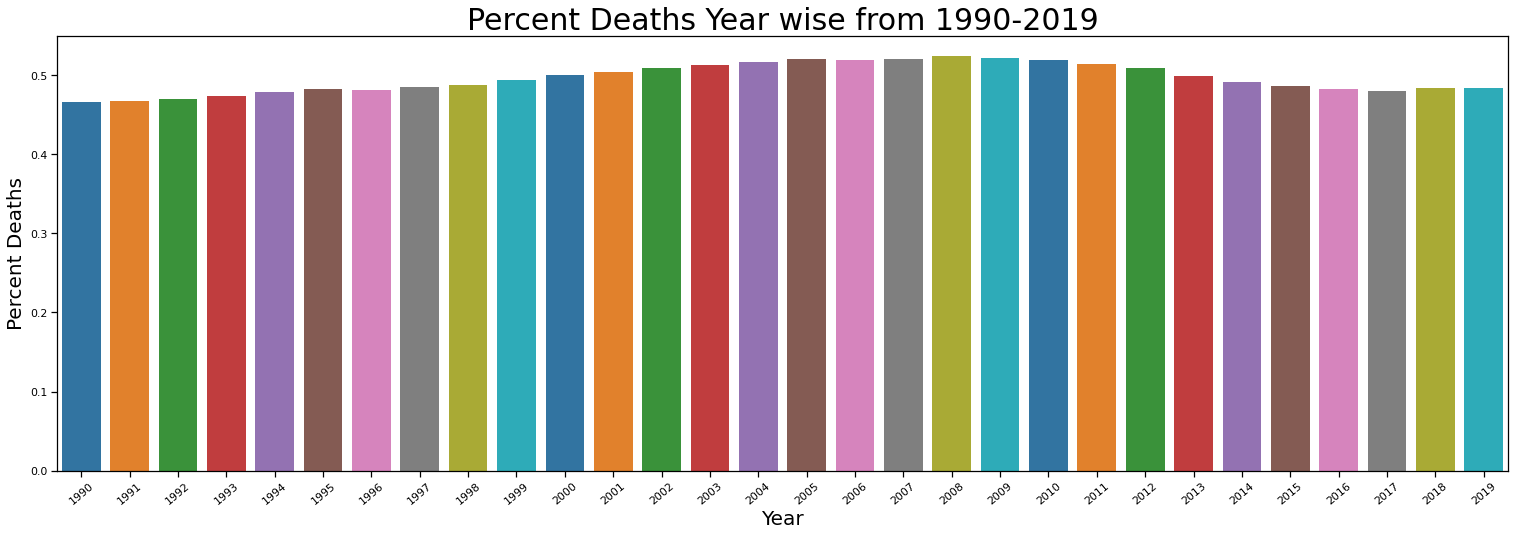

In [26]:
plt.figure(figsize=(26,8))
sns.barplot(data=percent_deaths_year_wise,x='Year',y='Percent Deaths',palette='tab10')
plt.title('Percent Deaths Year wise from 1990-2019',size=30)
plt.ylabel('Percent Deaths',size=20)
plt.xlabel('Year',size=20)
plt.xticks(rotation=40);

# <center><b id='top-region-deaths-yearly' style='color:red'> Top Regions with Max Deaths Year wise from 2015-2019<hr></b></center>

In [27]:
# Region with max deaths year wise from 2015 onwards
df1=df[df['Year']>=2015]
region_with_max_deaths_year_wise=df1.groupby(['Year','Region'])['Deaths'].max().reset_index()
region_with_max_deaths_year_wise.columns=['Year','Region','Total Deaths']
region_with_max_deaths_year_wise=region_with_max_deaths_year_wise.sort_values('Total Deaths',ascending=False)[:150]
region_with_max_deaths_year_wise.head()

,Year,Region,Total Deaths
259,2015,World,1202132
1327,2019,World,1198289
1060,2018,World,1196641
526,2016,World,1194268
793,2017,World,1189003


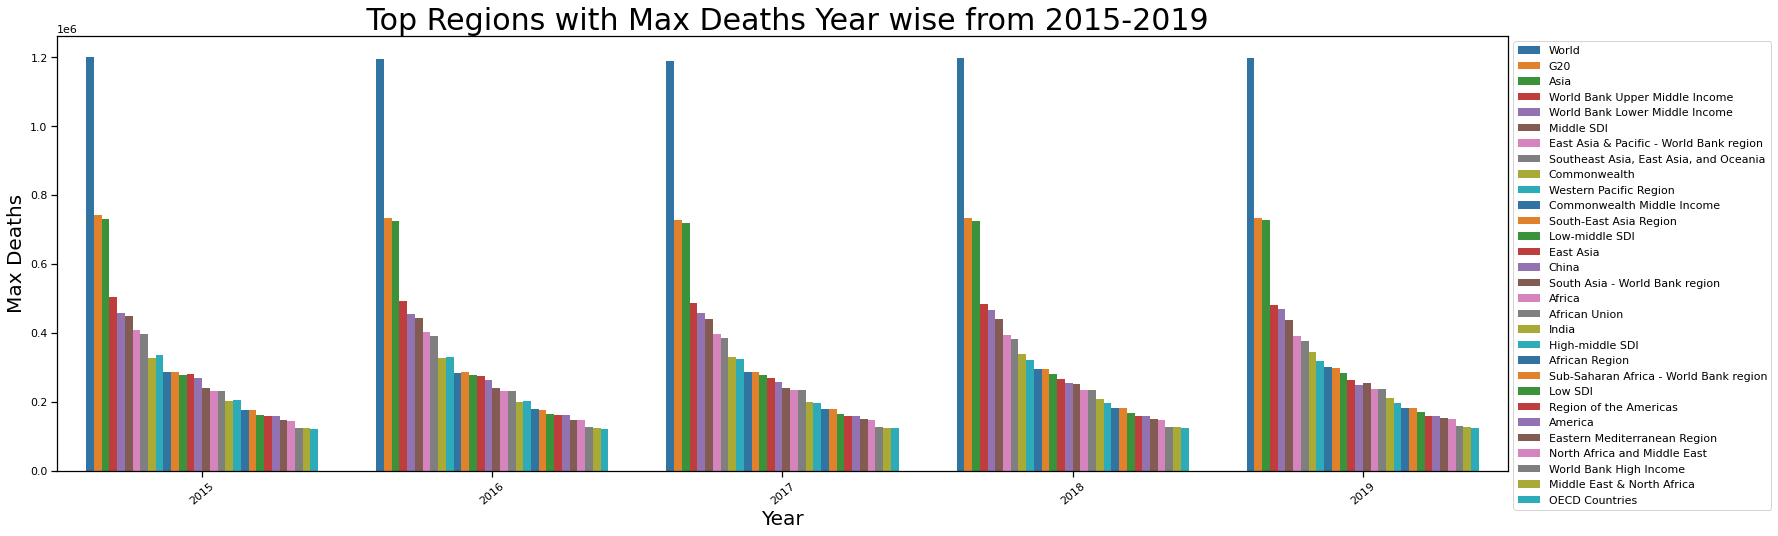

In [28]:
plt.figure(figsize=(26,8))
sns.barplot(data=region_with_max_deaths_year_wise,x='Year',y='Total Deaths',hue='Region',palette='tab10')
plt.title(' Top Regions with Max Deaths Year wise from 2015-2019',size=30)
plt.ylabel('Max Deaths',size=20)
plt.xlabel('Year',size=20)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xticks(rotation=40);

In [29]:
# regions with total_deaths_region_wise top 30
regions=total_deaths_region_wise['Region'].tolist()
regions[:10]

['World',
 'G20',
 'Asia',
 'World Bank Upper Middle Income',
 'Middle SDI',
 'East Asia & Pacific - World Bank region',
 'World Bank Lower Middle Income',
 'Southeast Asia, East Asia, and Oceania',
 'Western Pacific Region',
 'Commonwealth']

# <center><b id='dist-deaths-yearly' style='color:red'>Year wise Distribution of Deaths from 1990-2019 for Top 30 Regions with max Deaths<hr></b></center>

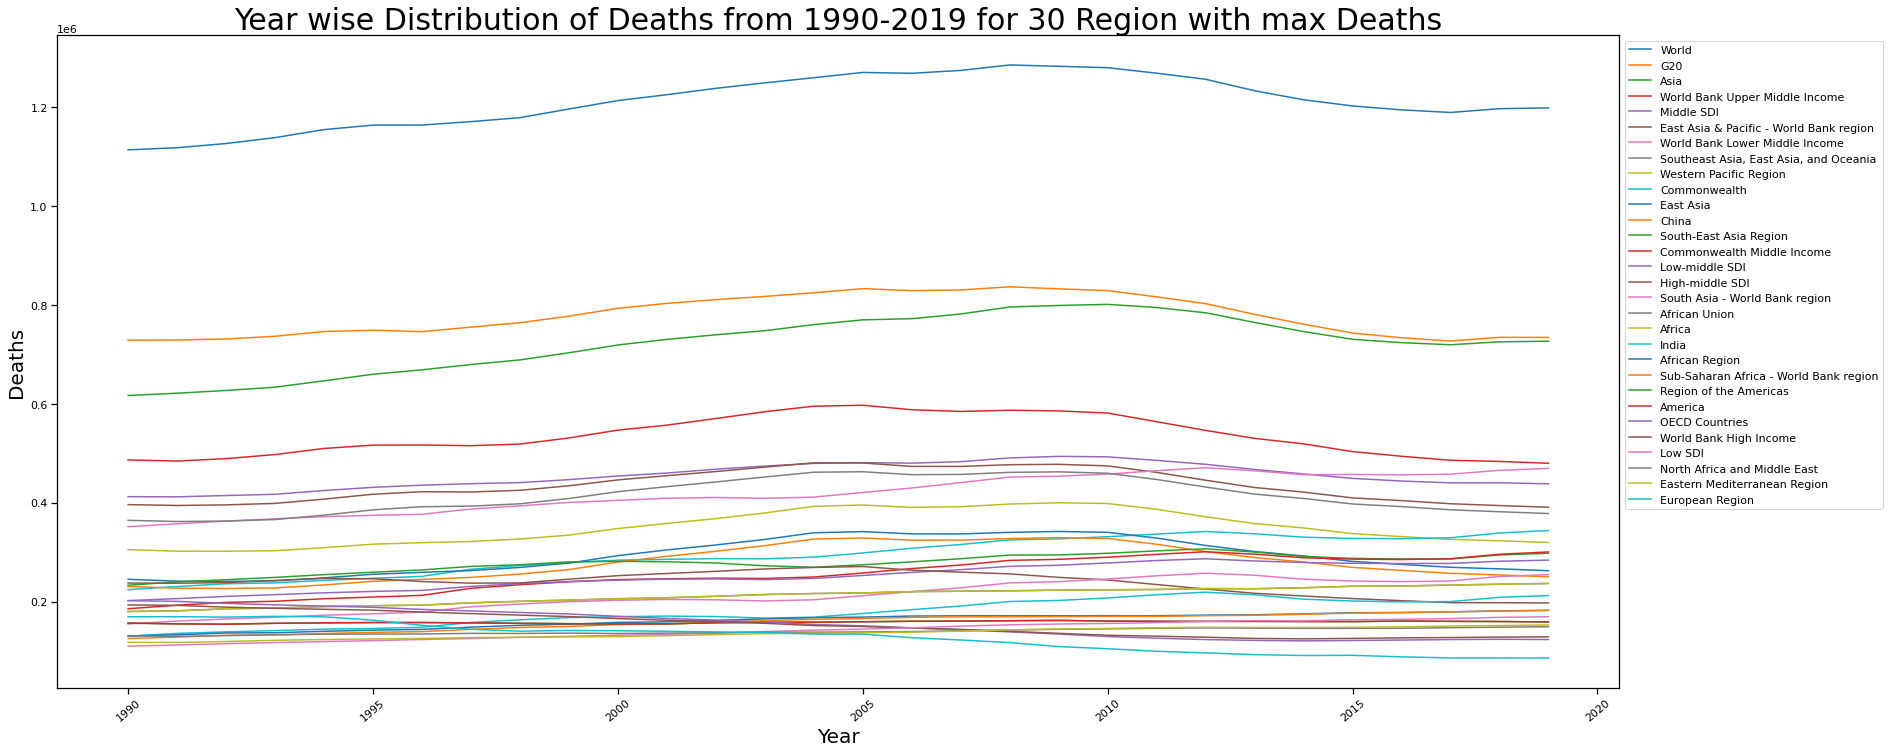

In [30]:
# Region wise distribution of deaths from 1990 to 2019
plt.figure(figsize=(28,12))
for region in regions:
    r=df.loc[df['Region']==region]
    sns.lineplot(data=r,x='Year',y='Deaths',palette='tab10')
    plt.title(f'Year wise Distribution of Deaths from 1990-2019 for 30 Region with max Deaths',size=30)
    plt.ylabel('Deaths',size=20)
    plt.xlabel('Year',size=20)
    plt.legend(regions,bbox_to_anchor=(1.0,1.0))
    plt.xticks(rotation=40);
plt.show()

<h2 style='text-align:center;color:#FF3355;font-weight:bold'> Do share your feedback in the comments section,I hope you found it to be helpful.🙌</h2>

<p style="background-color:#FF3355;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid red;">Thank You !!!😄<hr></p>
